In [48]:
import numpy as np
import pandas as pd 
import re

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Data

## Preprocessing

In [49]:
df = pd.read_csv("BasketProducts.csv", index_col="index")
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
index,,,,,,,,,
1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...


In [50]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [51]:
df = df.dropna()
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [52]:
df.dtypes

product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object

In [53]:
df.shape

(18840, 9)

## `category` analysys

In [54]:
counts = df['category'].value_counts()
counts

category
Beauty & Hygiene            5460
Kitchen, Garden & Pets      2494
Snacks & Branded Foods      2468
Gourmet & World Food        2364
Foodgrains, Oil & Masala    2173
Cleaning & Household        2091
Bakery, Cakes & Dairy        665
Beverages                    630
Baby Care                    495
Name: count, dtype: int64

In [55]:
count_percentage = df['category'].value_counts(1)*100
count_percentage


category
Beauty & Hygiene            28.980892
Kitchen, Garden & Pets      13.237792
Snacks & Branded Foods      13.099788
Gourmet & World Food        12.547771
Foodgrains, Oil & Masala    11.533970
Cleaning & Household        11.098726
Bakery, Cakes & Dairy        3.529724
Beverages                    3.343949
Baby Care                    2.627389
Name: proportion, dtype: float64

In [56]:
counts_df = pd.DataFrame({
    'Category': counts.index, 
    'Counts': counts.values,
    'Percent': np.round(count_percentage.values, 2)
})
counts_df

,Category,Counts,Percent
0,Beauty & Hygiene,5460,28.98
1,"Kitchen, Garden & Pets",2494,13.24
2,Snacks & Branded Foods,2468,13.10
3,Gourmet & World Food,2364,12.55
4,"Foodgrains, Oil & Masala",2173,11.53
5,Cleaning & Household,2091,11.10
6,"Bakery, Cakes & Dairy",665,3.53
7,Beverages,630,3.34
8,Baby Care,495,2.63


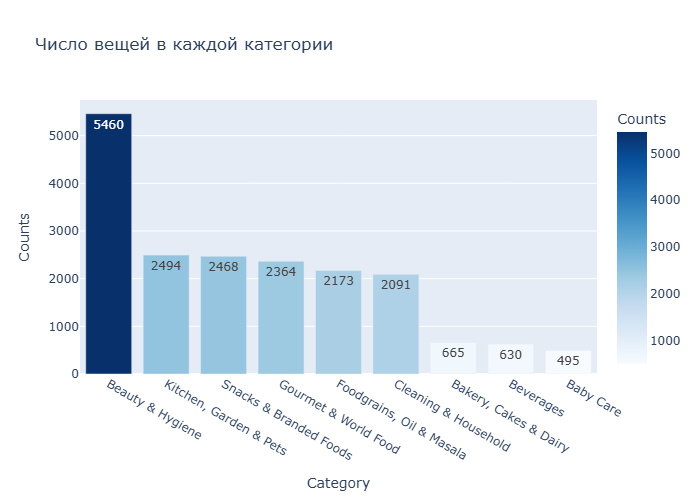

In [57]:
import plotly.io as pio
pio.renderers.default = 'png'
fig = px.bar(data_frame=counts_df,
             x='Category',
             y='Counts',
             color='Counts',
             color_continuous_scale='blues',
             text_auto=True,
             title='Число вещей в каждой категории')
fig.show()

## `brand` analysys

In [58]:
column = 'brand'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1)*100
counts_df = pd.DataFrame({
    'brand': counts.index, 
    'Counts': counts.values,
    'Percent': np.round(count_percentage.values, 2)
})

print('Уникальные ' + str(column) + ' Количество = ' + str(df['sub_category'].nunique()))
print('Топ 10 брендов')
display(counts_df.head(10))
print('Самые худшие топ 10 брендов')
display(counts_df.tail(10))

Уникальные brand Количество = 77
Топ 10 брендов


,brand,Counts,Percent
0,bb Royal,278,1.48
1,BB Home,172,0.91
2,Amul,153,0.81
3,Himalaya,139,0.74
4,Cello,104,0.55
5,BIOTIQUE,103,0.55
6,DP,101,0.54
7,Keya,101,0.54
8,Organic Tattva,99,0.53
9,MTR,97,0.51


Самые худшие топ 10 брендов


,brand,Counts,Percent
1923,Yoni,1,0.01
1924,Vochelle,1,0.01
1925,Ancient Living,1,0.01
1926,Goodluck,1,0.01
1927,NNF,1,0.01
1928,Bachun,1,0.01
1929,Dhishoom,1,0.01
1930,Double Pagoda,1,0.01
1931,Muscleblaze,1,0.01
1932,Mamy,1,0.01


## `discount` analysys

In [59]:
df['discount'] = ((df['market_price'] - df['sale_price']) / df['sale_price']) * 100
df['discount'].describe()

C:\Users\Rog G16\AppData\Local\Temp\ipykernel_20232\2909290784.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    18840.000000
mean        17.795110
std         29.226346
min          0.000000
25%          0.000000
50%          5.263158
75%         25.000000
max        471.633238
Name: discount, dtype: float64

In [60]:
pd.cut(df.discount, bins=[-1, 0, 10, 20, 30, 40, 50, 60, 80, 90, 100]).reset_index().groupby(['discount']).size()

C:\Users\Rog G16\AppData\Local\Temp\ipykernel_20232\361830158.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



discount
(-1, 0]      8157
(0, 10]      1888
(10, 20]     3122
(20, 30]     1612
(30, 40]     1348
(40, 50]      878
(50, 60]      480
(60, 80]      576
(80, 90]      175
(90, 100]     269
dtype: int64

## correlation

            sale_price  discount    rating
sale_price    1.000000  0.062876 -0.080026
discount      0.062876  1.000000 -0.083588
rating       -0.080026 -0.083588  1.000000


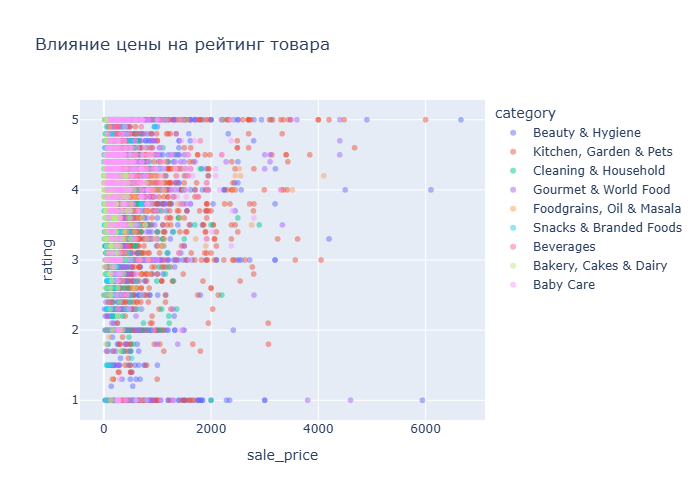

In [61]:
correlation = df[['sale_price', 'discount', 'rating']].corr()
print(correlation)

fig = px.scatter(df, x="sale_price", y="rating", color="category",
                 title="Влияние цены на рейтинг товара", opacity=0.5)
fig.show()

In [62]:
df2 = df.copy()
rmv_spc = lambda a: a.strip()

get_list = lambda a: list(map(rmv_spc, re.split(r'(&|,|\*|n-)', a)))

for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

## wordcloud для красоты

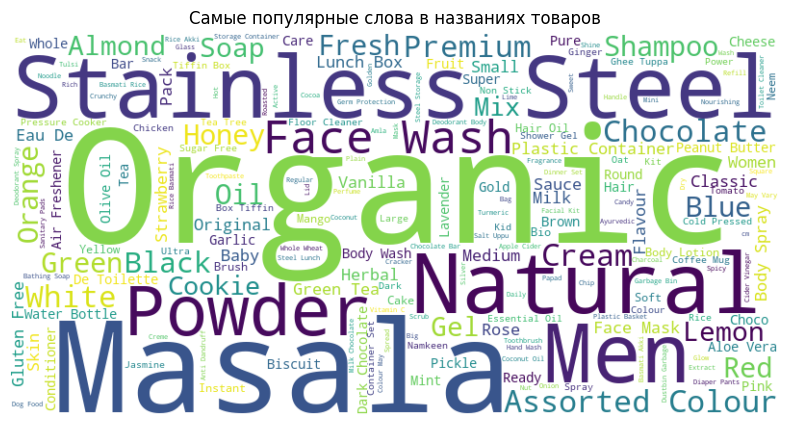

In [63]:
from wordcloud import WordCloud

text = " ".join(i for i in df['product'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Самые популярные слова в названиях товаров")
plt.show()

In [64]:
for col in ['category', 'sub_category', 'type', 'brand']:
    df2[col] = df2[col].apply(cleaner)

def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' ' + x['brand'] + ' ' + ' '.join(x['type'])

df2['product_classification_features'] = df2.apply(couple, axis=1)


# Recomendations

## most popular

In [65]:


def recommend_most_popular(col, col_value, top_n=5):
    return df[df[col] == col_value].sort_values(by='rating', ascending=False).head(top_n)[['product', 'rating']]

recommend_most_popular('category', 'Beauty & Hygiene')

,product,rating
index,,
27446,Organic Virgin Coconut Oil - Pure Coldpressed ...,5.0
13,"Face Wash - Oil Control, Active",5.0
17,Smooth Skin Oil - For Dry Skin,5.0
27549,Apple Cider Vinegar Shampoo,5.0
18341,"Baby Happy Cotton Pads With D Panthenol, Chamo...",5.0


## CountVectorizer

In [66]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['product_classification_features'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim)

def content_recommendation_v1(title):
    a = df2.copy().reset_index().drop('index', axis=1)
    index = a[a['product'] == title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['product']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index].values
    return similar_df

title = 'Dark Chocolate'
content_recommendation_v1(title)

,product,cosine_similarity
105,I Love You Fruit N Nut Chocolate,1.0
163,Dark Chocolate- 55% Rich In Cocoa,1.0
1144,Choco Cracker - Magical Crystal With Milk Choc...,1.0
1718,"Dark Chocolate - Single Origin, India",1.0
2517,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",1.0
3117,"Colombia Classique Black, Single Origin Dark C...",1.0
4013,Almondo - Roasted Almonds Coated With Milk Cho...,1.0
4358,Sugar Free Dark Chocolate,1.0
5867,Milk Compound Slab - MCO-11,1.0


In [67]:
count2 = CountVectorizer(stop_words='english', lowercase=True)
count_matrix2 = count2.fit_transform(df2['product'])
cosine_sim2 = cosine_similarity(count_matrix2, count_matrix2)
cosine_sim_df2 = pd.DataFrame(cosine_sim2)

def content_recommendation_v2(title):
    a = df2.copy().reset_index().drop('index', axis=1)
    index = a[a['product'] == title].index[0]
    
    similar_basis_metric_1 = cosine_sim_df[cosine_sim_df[index] > 0][index].reset_index().rename(columns={index: 'sim_1'})
    similar_basis_metric_2 = cosine_sim_df2[cosine_sim_df2[index] > 0][index].reset_index().rename(columns={index: 'sim_2'})
    
    similar_df = similar_basis_metric_1.merge(similar_basis_metric_2, how='left').merge(a[['product']].reset_index(), how='left')
    similar_df['sim'] = similar_df[['sim_1', 'sim_2']].fillna(0).mean(axis=1)
    similar_df = similar_df[similar_df['index'] != index].sort_values(by='sim', ascending=False)
    
    return similar_df[['product', 'sim']].head(10)

title = 'Dark Chocolate'
content_recommendation_v2(title)

,product,sim
2592,Best Wishes Dark Chocolate,0.853553
777,Sugar Free Dark Chocolate,0.853553
1222,Prebiotic Chocolate - Dark Chocolate,0.845492
2544,"Peru Dark Amazon, Single Origin Dark Chocolate...",0.835410
548,"Colombia Classique Black, Single Origin Dark C...",0.819801
1713,"Madagascar Noir De Cacao, Single Origin Dark C...",0.819801
2941,"Tanzania Chocolat Noir, Single Origin Dark Cho...",0.819801
2951,Dark Chocolate Slab - DCH-47,0.816228
307,"Dark Chocolate - Single Origin, India",0.816228
27,Dark Chocolate- 55% Rich In Cocoa,0.816228


In [68]:
def content_recommendation_smart(title, cheaper_only=False):
    temp_df = df2.copy().reset_index().drop('index', axis=1)
    
    try:
        idx = temp_df[temp_df['product'] == title].index[0]
    except IndexError:
        return "Товар не найден"

    sim_basis_1 = cosine_sim_df[idx]
    sim_basis_2 = cosine_sim_df2[idx]
    
    similar_df = pd.DataFrame({
        'index': range(len(temp_df)),
        'sim_1': sim_basis_1,
        'sim_2': sim_basis_2
    })
    
    similar_df['sim'] = similar_df[['sim_1', 'sim_2']].mean(axis=1)
    full_df = df.copy().reset_index(drop=True)
    similar_df = similar_df.merge(full_df[['product', 'sale_price', 'rating', 'category']], 
                                  left_on='index', right_index=True)

    similar_df = similar_df[similar_df['index'] != idx]

    if cheaper_only:
        current_price = full_df.loc[idx, 'sale_price']
        similar_df = similar_df[similar_df['sale_price'] < current_price]

    return similar_df[['product', 'sale_price', 'rating', 'sim']].sort_values(by='sim', ascending=False).head(10)

# Проверка:
print("Обычные рекомендации:")
display(content_recommendation_smart('Dark Chocolate', cheaper_only=False))

print("\nТолько те, что дешевле:")
display(content_recommendation_smart('Dark Chocolate', cheaper_only=True))

Обычные рекомендации:


,product,sale_price,rating,sim
14498,Best Wishes Dark Chocolate,90.00,4.3,0.853553
4358,Sugar Free Dark Chocolate,30.00,4.2,0.853553
6868,Prebiotic Chocolate - Dark Chocolate,40.00,4.5,0.845492
14239,"Peru Dark Amazon, Single Origin Dark Chocolate...",140.00,4.4,0.835410
9636,"Madagascar Noir De Cacao, Single Origin Dark C...",140.00,4.1,0.819801
3117,"Colombia Classique Black, Single Origin Dark C...",140.00,4.3,0.819801
16450,"Tanzania Chocolat Noir, Single Origin Dark Cho...",140.00,4.3,0.819801
163,Dark Chocolate- 55% Rich In Cocoa,87.12,4.3,0.816228
1718,"Dark Chocolate - Single Origin, India",75.00,4.2,0.816228
16512,Dark Chocolate Slab - DCH-47,190.00,4.4,0.816228



Только те, что дешевле:


,product,sale_price,rating,sim
12494,Sugar Coated Chocolate,5.00,4.2,0.641624
7831,White Chocolate Bar,10.00,4.4,0.641624
9935,Cadbury Perk - Chocolate Bar,5.00,4.2,0.614277
3908,Classic Milk Chocolate Candy,16.00,4.3,0.614277
12512,Gems - Sugar Coated Chocolate,10.00,4.3,0.614277
16285,KitKat Chocolate Wafer Bar - 4 Fingers Pack,23.75,4.3,0.581838
928,"Chocolate Bar - Bar One, Charge",16.00,4.4,0.581838
12207,Creamy Milky & Cocoa Chocolate With Extruded Rice,20.00,3.9,0.581838
17024,Munch Crisp-Pop Chocolate Coated Crunchy Wafer,8.50,4.2,0.571131
14257,Kitkat 2 Fingers,15.00,4.2,0.437500


## TfidfVectorizer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', lowercase=True)
tfidf_matrix = tfidf.fit_transform(df2['product_classification_features'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_sim_df = pd.DataFrame(cosine_sim)

def content_recommendation_v1(title):
    a = df2.copy().reset_index().drop('index', axis=1)
    index = a[a['product'] == title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['product']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index].values
    return similar_df

title = 'Dark Chocolate'
content_recommendation_v1(title)

,product,cosine_similarity
105,I Love You Fruit N Nut Chocolate,1.0
163,Dark Chocolate- 55% Rich In Cocoa,1.0
1144,Choco Cracker - Magical Crystal With Milk Choc...,1.0
1718,"Dark Chocolate - Single Origin, India",1.0
2517,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",1.0
3117,"Colombia Classique Black, Single Origin Dark C...",1.0
4013,Almondo - Roasted Almonds Coated With Milk Cho...,1.0
4358,Sugar Free Dark Chocolate,1.0
5867,Milk Compound Slab - MCO-11,1.0


In [70]:
tfidf2 = TfidfVectorizer(stop_words='english', lowercase=True)
tfidf2_matrix2 = tfidf2.fit_transform(df2['product_classification_features'])
cosine_sim2 = cosine_similarity(tfidf2_matrix2, tfidf2_matrix2)
cosine_sim_df2 = pd.DataFrame(cosine_sim2)

def content_recommendation_v2(title):
    a = df2.copy().reset_index().drop('index', axis=1)
    index = a[a['product'] == title].index[0]
    
    similar_basis_metric_1 = cosine_sim_df[cosine_sim_df[index] > 0][index].reset_index().rename(columns={index: 'sim_1'})
    similar_basis_metric_2 = cosine_sim_df2[cosine_sim_df2[index] > 0][index].reset_index().rename(columns={index: 'sim_2'})
    
    similar_df = similar_basis_metric_1.merge(similar_basis_metric_2, how='left').merge(a[['product']].reset_index(), how='left')
    similar_df['sim'] = similar_df[['sim_1', 'sim_2']].fillna(0).mean(axis=1)
    similar_df = similar_df[similar_df['index'] != index].sort_values(by='sim', ascending=False)
    
    return similar_df[['product', 'sim']].head(10)

title = 'Dark Chocolate'
content_recommendation_v2(title)

,product,sim
27,Dark Chocolate- 55% Rich In Cocoa,1.0
3247,Mystic Mocha - Bold Coffee Blended With Finest...,1.0
777,Sugar Free Dark Chocolate,1.0
2134,Happy Birthday Milk Chocolate,1.0
548,"Colombia Classique Black, Single Origin Dark C...",1.0
727,Almondo - Roasted Almonds Coated With Milk Cho...,1.0
437,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",1.0
2592,Best Wishes Dark Chocolate,1.0
2544,"Peru Dark Amazon, Single Origin Dark Chocolate...",1.0
2089,"Ivory Coast Grande Nuit, Single Origin Dark Ch...",1.0


In [71]:
def content_recommendation_smart(title, cheaper_only=False):
    temp_df = df2.copy().reset_index().drop('index', axis=1)
    
    try:
        idx = temp_df[temp_df['product'] == title].index[0]
    except IndexError:
        return "Товар не найден"

    sim_basis_1 = cosine_sim_df[idx]
    sim_basis_2 = cosine_sim_df2[idx]
    
    similar_df = pd.DataFrame({
        'index': range(len(temp_df)),
        'sim_1': sim_basis_1,
        'sim_2': sim_basis_2
    })
    
    similar_df['sim'] = similar_df[['sim_1', 'sim_2']].mean(axis=1)
    full_df = df.copy().reset_index(drop=True)
    similar_df = similar_df.merge(full_df[['product', 'sale_price', 'rating', 'category']], 
                                  left_on='index', right_index=True)

    similar_df = similar_df[similar_df['index'] != idx]

    if cheaper_only:
        current_price = full_df.loc[idx, 'sale_price']
        similar_df = similar_df[similar_df['sale_price'] < current_price]

    return similar_df[['product', 'sale_price', 'rating', 'sim']].sort_values(by='sim', ascending=False).head(10)

# Проверка:
print("Обычные рекомендации:")
display(content_recommendation_smart('Dark Chocolate', cheaper_only=False))

print("\nТолько те, что дешевле:")
display(content_recommendation_smart('Dark Chocolate', cheaper_only=True))

Обычные рекомендации:


,product,sale_price,rating,sim
13146,Sugar Free Dark Chocolate- 55% Rich In Cocoa,115.00,4.3,1.0
5867,Milk Compound Slab - MCO-11,100.00,4.3,1.0
16894,White Limon Chocolate,140.00,4.1,1.0
9636,"Madagascar Noir De Cacao, Single Origin Dark C...",140.00,4.1,1.0
3117,"Colombia Classique Black, Single Origin Dark C...",140.00,4.3,1.0
4013,Almondo - Roasted Almonds Coated With Milk Cho...,200.00,4.5,1.0
8252,Dark Compound Slab - DCO-18,90.00,4.4,1.0
17681,Camel Milk Chocolate- Unique Treat Of Cocoa An...,106.25,3.9,1.0
14239,"Peru Dark Amazon, Single Origin Dark Chocolate...",140.00,4.4,1.0
2517,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",87.12,4.3,1.0



Только те, что дешевле:


,product,sale_price,rating,sim
12512,Gems - Sugar Coated Chocolate,10.00,4.3,0.736930
9935,Cadbury Perk - Chocolate Bar,5.00,4.2,0.736930
928,"Chocolate Bar - Bar One, Charge",16.00,4.4,0.735333
16285,KitKat Chocolate Wafer Bar - 4 Fingers Pack,23.75,4.3,0.735333
14257,Kitkat 2 Fingers,15.00,4.2,0.735333
17298,Kitkat 3 Fingers,20.00,4.3,0.735333
3908,Classic Milk Chocolate Candy,16.00,4.3,0.735333
7831,White Chocolate Bar,10.00,4.4,0.735333
17024,Munch Crisp-Pop Chocolate Coated Crunchy Wafer,8.50,4.2,0.735333
7243,Choco Deck - French Dessert Inspired Layered Bar,20.00,3.9,0.721000
